In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import numpy as np
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('data\car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df.shape

(301, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
cols = df.select_dtypes(include='object').drop(['Car_Name'], axis=1).columns
for i in cols:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [25]:
train = df.drop(['Car_Name'],1)

In [26]:
train.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
train['current_year'] = 2021
train.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [28]:
train['car_age'] = train['current_year']-train['Year']

In [29]:
train.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [30]:
train.drop(['Year','current_year'], axis=1, inplace=True)
train.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [31]:
train2 = pd.get_dummies(train, columns = ['Fuel_Type'], drop_first = True)

In [32]:
var_list =  ["Seller_Type", "Transmission"]
def binary_map(x):
    return x.map({'Dealer': 0, "Individual": 1, "Manual":0, "Automatic":1})
train2[var_list] = train2[var_list].apply(binary_map)
train2.head()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,0,0,0,7,0,1
1,4.75,9.54,43000,0,0,0,8,1,0
2,7.25,9.85,6900,0,0,0,4,0,1
3,2.85,4.15,5200,0,0,0,10,0,1
4,4.60,6.87,42450,0,0,0,7,1,0


In [35]:
cor = round(train2.corr(),3)
cor

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol
Selling_Price,1.000,0.879,0.029,-0.551,0.367,-0.088,-0.236,0.552,-0.541
Present_Price,0.879,1.000,0.204,-0.512,0.349,0.008,0.048,0.473,-0.465
Kms_Driven,0.029,0.204,1.000,-0.101,0.163,0.089,0.524,0.173,-0.173
Seller_Type,-0.551,-0.512,-0.101,1.000,-0.063,0.124,0.040,-0.350,0.358
Transmission,0.367,0.349,0.163,-0.063,1.000,0.050,0.000,0.099,-0.091
Owner,-0.088,0.008,0.089,0.124,0.050,1.000,0.182,-0.053,0.056
car_age,-0.236,0.048,0.524,0.040,0.000,0.182,1.000,-0.064,0.060
Fuel_Type_Diesel,0.552,0.473,0.173,-0.350,0.099,-0.053,-0.064,1.000,-0.980
Fuel_Type_Petrol,-0.541,-0.465,-0.173,0.358,-0.091,0.056,0.060,-0.980,1.000


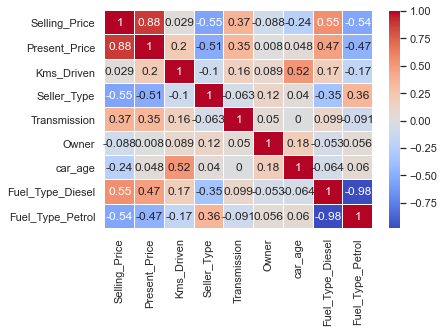

In [36]:
with plt.rc_context():
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)
    sns.heatmap(cor, annot = True, cmap = 'coolwarm', linewidth = 0.01, annot_kws={"fontsize":12})
    plt.show()

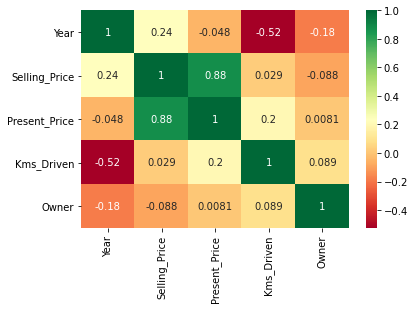

In [37]:
corrmat = df.corr()
top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

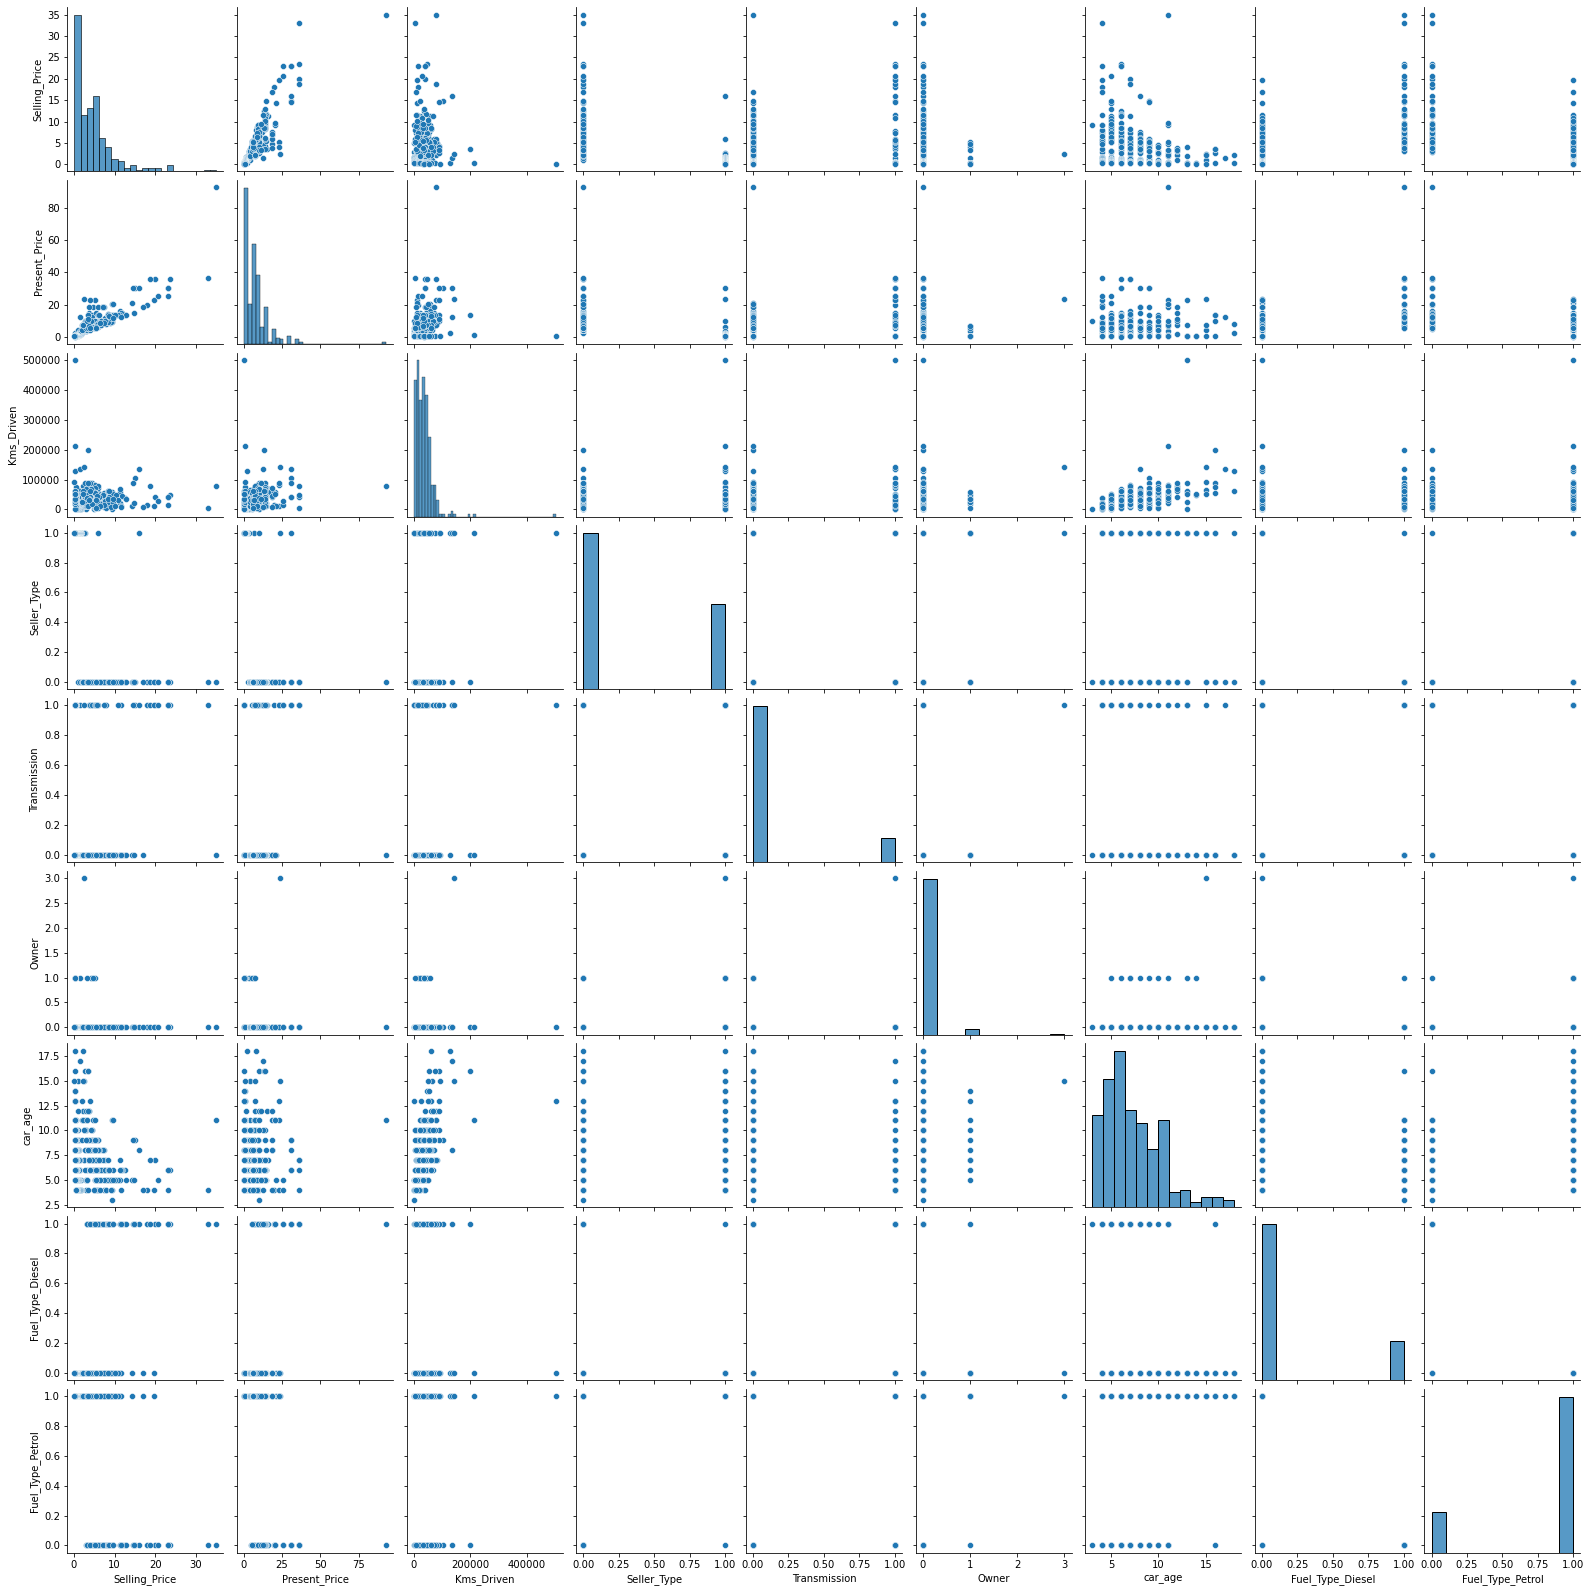

In [38]:
sns.pairplot(train2)

In [39]:
X=train2.iloc[:,1:]
y=train2.iloc[:,0]

In [40]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [41]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [42]:
print(model.feature_importances_)

[0.37804447 0.03805396 0.12593368 0.14060869 0.0006532  0.0775889
 0.22686904 0.01224805]


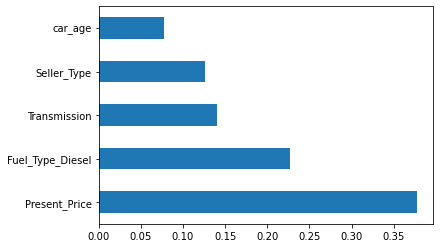

In [43]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [49]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter = 10,
                               cv = 5,
                               verbose=1,
                               random_state=42,
                               n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [50]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [51]:
rf_random.best_score_

-4.574906858074343

In [52]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

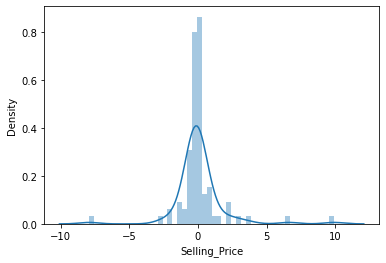

In [53]:
sns.distplot(y_test-predictions)

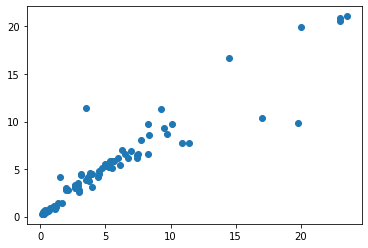

In [54]:
plt.scatter(y_test,predictions)

In [55]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8249692307692302
MSE: 3.1105325399472528
RMSE: 1.7636701902417167


In [57]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)